# DATA VISUALIZATION COURSE PROJECT 2024-25


## *Year:* SY
## *Division:* CSE AI B
## *Batch:* 2
## *Group:* 8

## **Members:**
###33  12310543  SHREY RUPNAVAR
###37  12310120  ATHARVA SALITRI
###60  12310237  TANISHQ THUSE
###61  12311279  TRIPTI MIRANI

## **Problem Statement:**
**Parkinson's disease (PD)** is a neurodegenerative disorder that affects millions of people worldwide. Early and accurate diagnosis of Parkinson's disease is crucial for effective management and treatment. Traditional diagnostic methods often rely on clinical evaluations, which can be subjective and may not detect early-stage PD.

**Machine learning (ML)** offers a potential solution by analyzing patterns in vocal measurements to distinguish between healthy individuals and those with Parkinson's disease. The Oxford Parkinson's Disease Detection Dataset provides a range of vocal features that can be used to train various ML algorithms for this purpose.

**Dataset:** https://archive.ics.uci.edu/dataset/174/parkinsons

## **Objective:**
The objective of this project is to compare the performance of different machine learning algorithms in detecting Parkinson's disease based on vocal features from the Oxford Parkinson's Disease Detection Dataset.

By evaluating the accuracy, precision, recall, F1-score, and other relevant metrics of each algorithm, we aim to determine the most effective model for diagnosing Parkinson's disease.

## **Attribute Information:**

**Matrix column entries (attributes):**

**name** - ASCII subject name and recording number

**MDVP:Fo(Hz)** - Average vocal fundamental frequency

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

**MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency

**MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude

**NHR, HNR** - Two measures of the ratio of noise to tonal components in the voice

**status** - The health status of the subject (one) - Parkinson's, (zero) - healthy

**RPDE, D2** - Two nonlinear dynamical complexity measures

**DFA** - Signal fractal scaling exponent

**spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation

## **Step 1: Data Loading & Pre-processing**

1.1 Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.2 Load the dataset

In [ ]:
df = pd.read_csv('parkinsons.data')

1.3 Basic processing

In [ ]:
print(df.head(5))
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

1.4 Distribution of target variable & its visualization

In [ ]:
print(df['status'].value_counts())

status
1    147
0     48
Name: count, dtype: int64


**1 --> Parkison's Positive**

**0 --> Healthy Person**

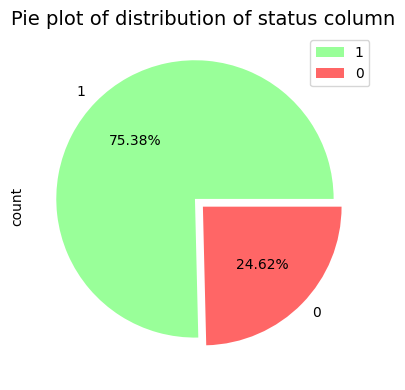

In [ ]:
explode=(0.08,0)

df['status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(4,4),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie plot of distribution of status column", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

1.5 Check for outliers

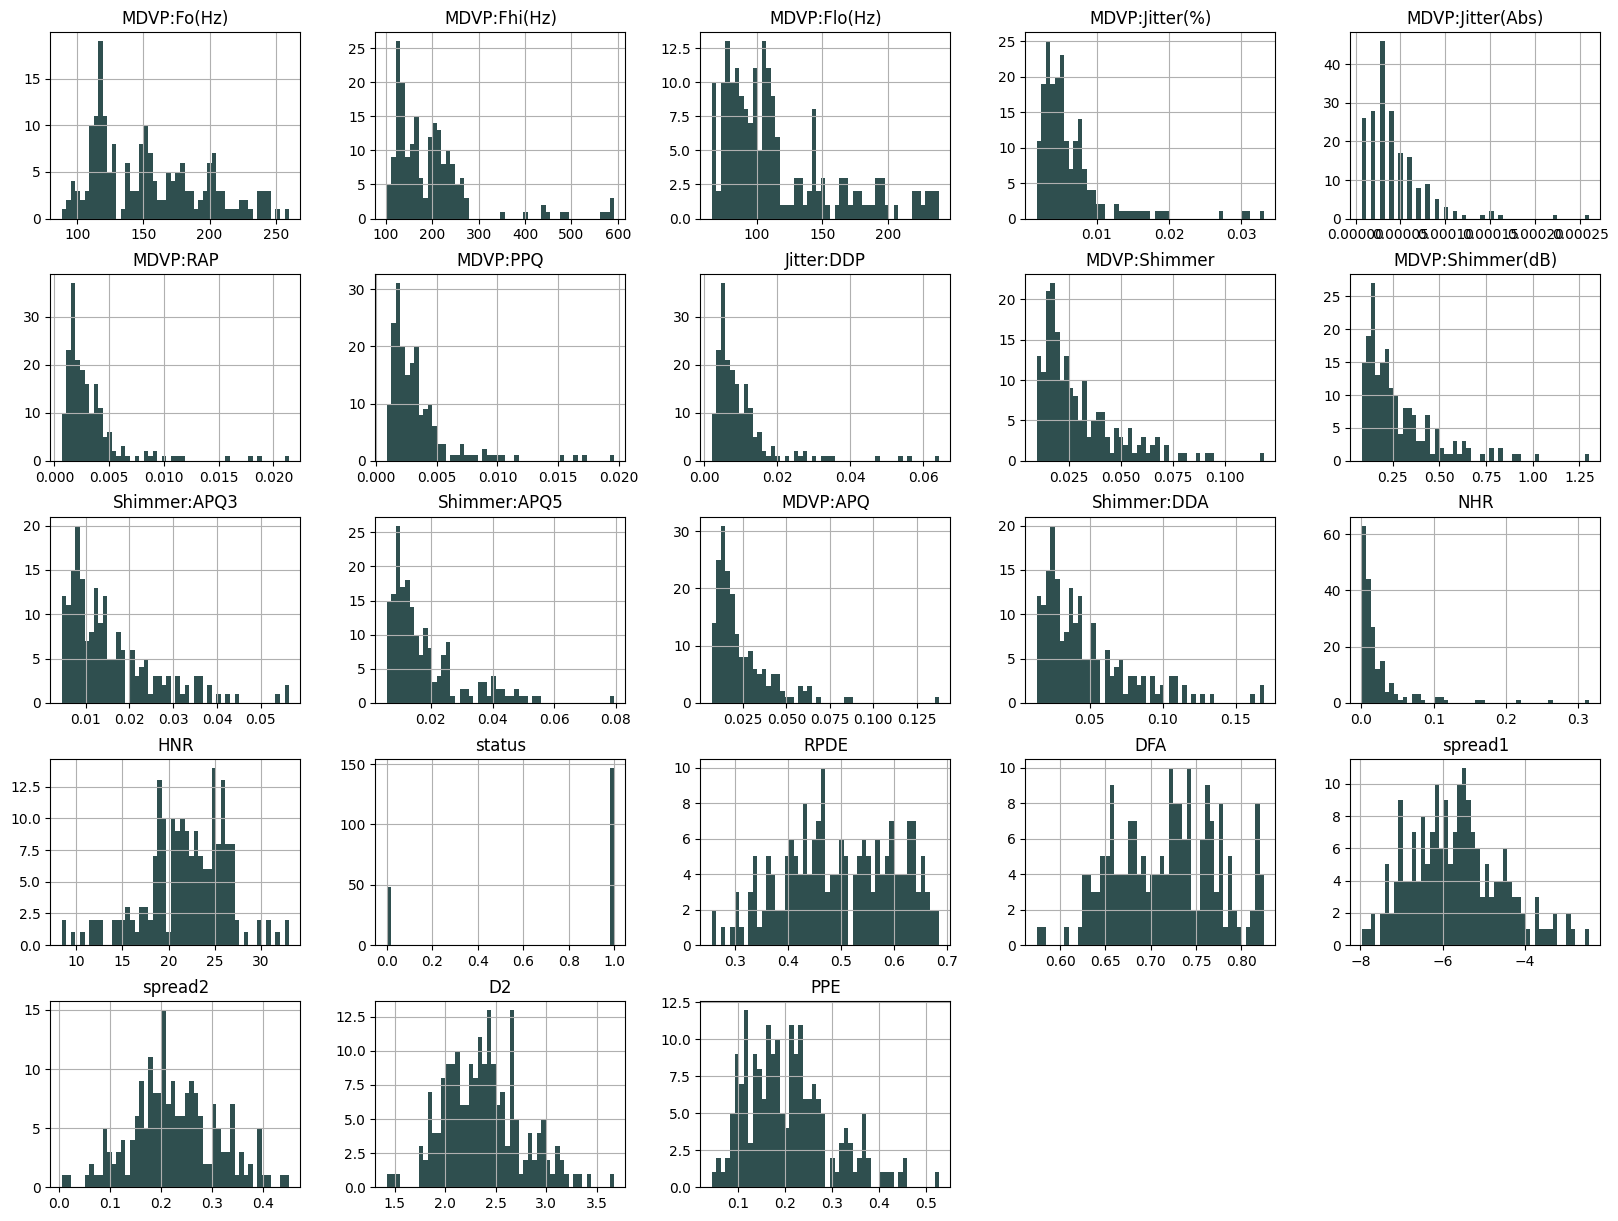

In [ ]:
df.hist(bins=50, figsize =(20,15), color = 'darkslategrey')
plt.show(block=False)

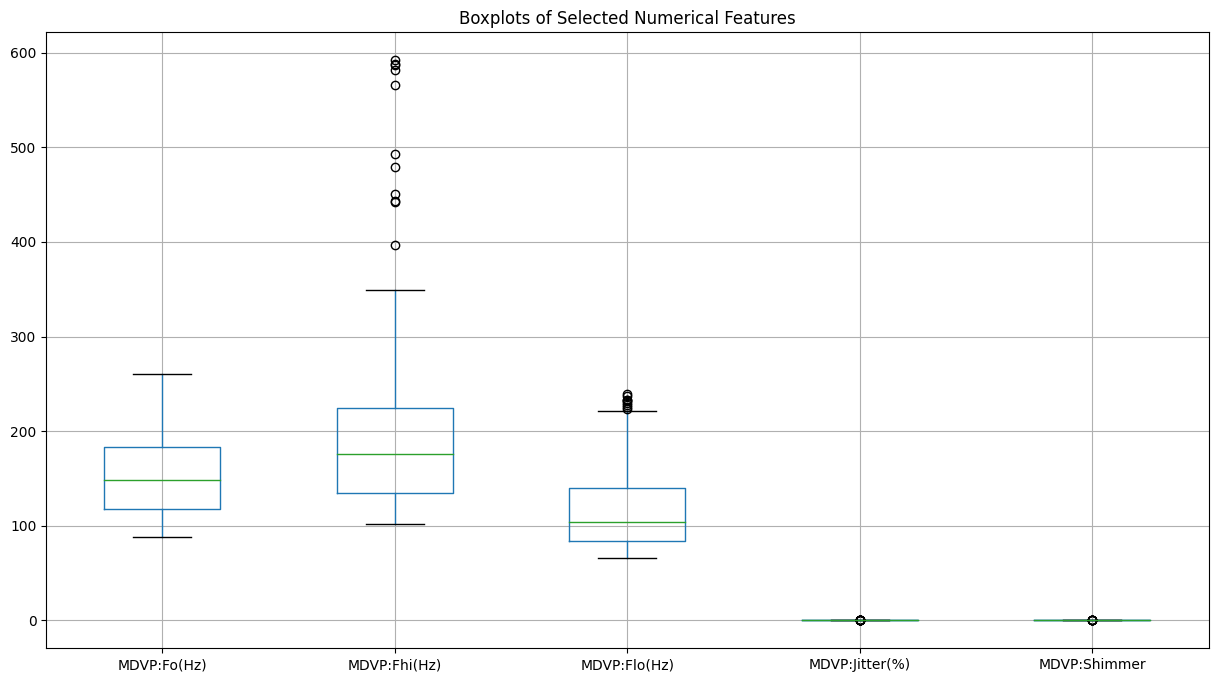

In [ ]:
plt.figure(figsize=(15, 8))
df.boxplot(column=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer'])
plt.title('Boxplots of Selected Numerical Features')
plt.show()

1.5.1 Detailed Analysis of Outliers

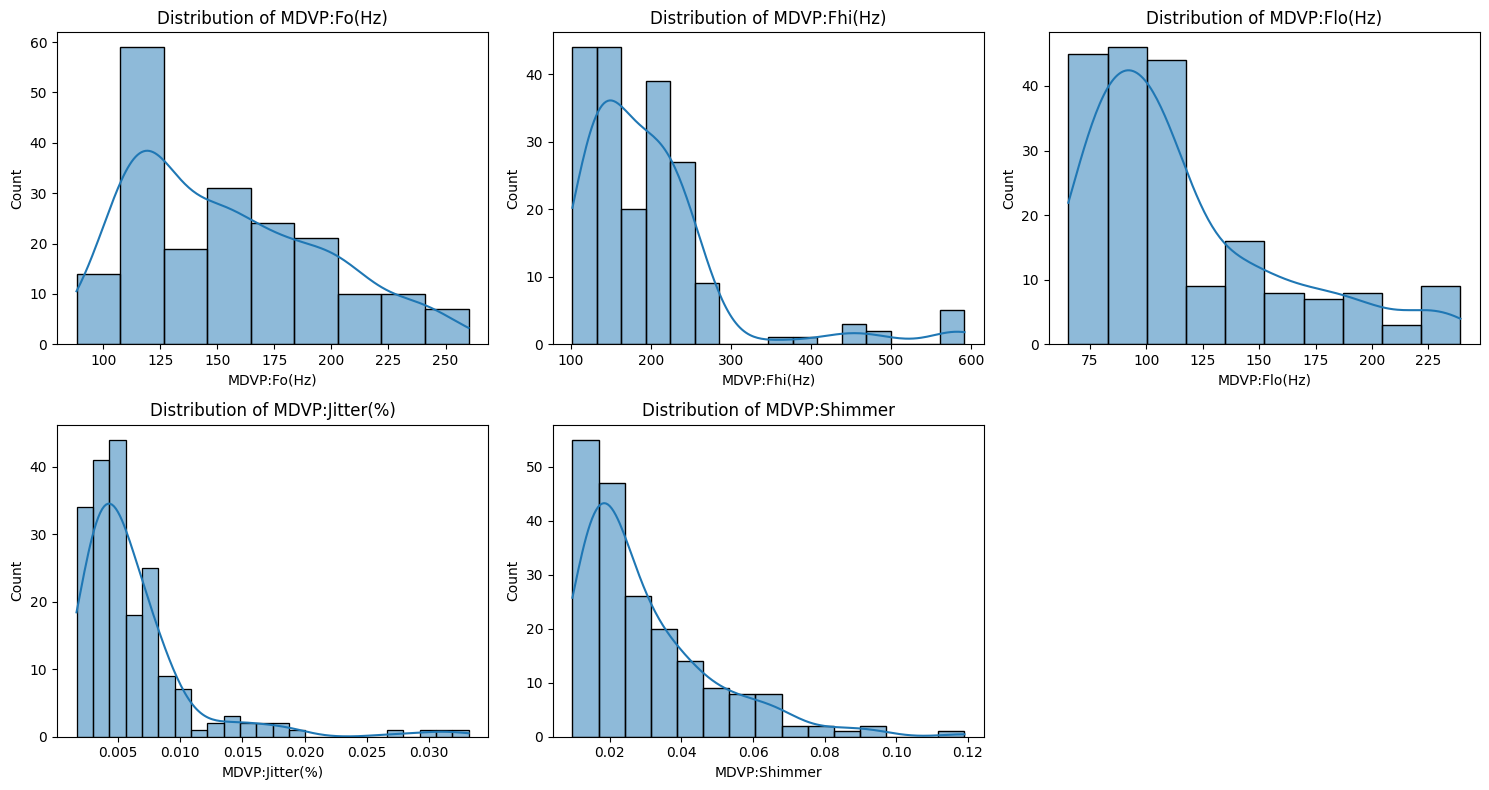

In [ ]:
outlier_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(outlier_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

1.5.2 Log Transformations of Skewed Features

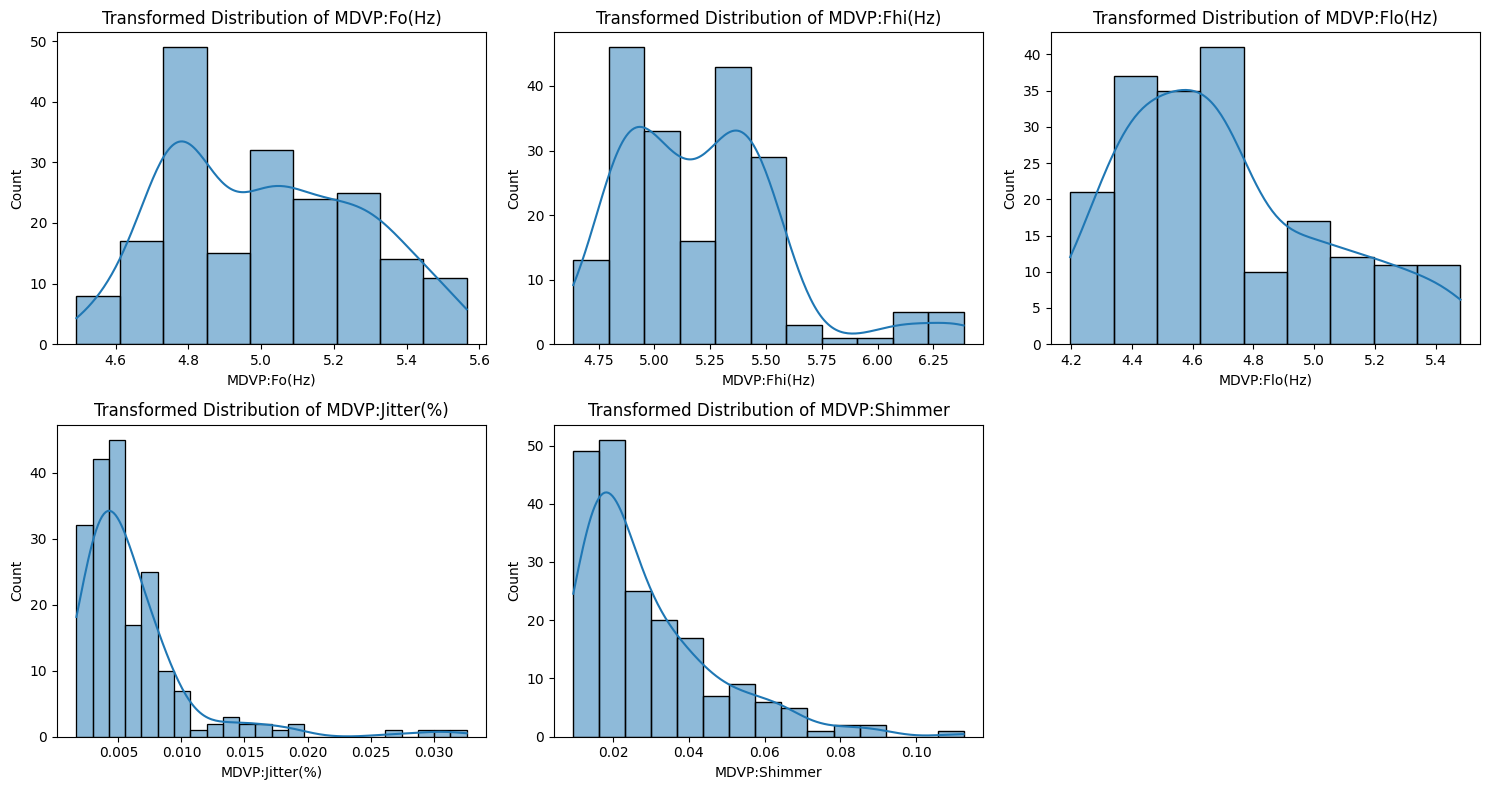

In [ ]:
# Apply log transformation to skewed features
skewed_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer']
df[skewed_features] = df[skewed_features].apply(lambda x: np.log(x + 1))

# Visualize the transformed features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(skewed_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Transformed Distribution of {feature}')
plt.tight_layout()
plt.show()

1.5.3 Handling of invalid values

In [ ]:
# Checking for NaN or infinite values
print(df[skewed_features].isnull().sum())
print(np.isinf(df[skewed_features]).sum())

# Replacing NaN and infinite values with a small number (e.g., 0)
df[skewed_features] = df[skewed_features].replace([np.inf, -np.inf], np.nan)
df[skewed_features] = df[skewed_features].fillna(0)

# Checking the updated NaN or infinite values
print(df[skewed_features].isnull().sum())
print(np.isinf(df[skewed_features]).sum())

MDVP:Fo(Hz)       0
MDVP:Fhi(Hz)      0
MDVP:Flo(Hz)      0
MDVP:Jitter(%)    0
MDVP:Shimmer      0
dtype: int64
MDVP:Fo(Hz)       0
MDVP:Fhi(Hz)      0
MDVP:Flo(Hz)      0
MDVP:Jitter(%)    0
MDVP:Shimmer      0
dtype: int64
MDVP:Fo(Hz)       0
MDVP:Fhi(Hz)      0
MDVP:Flo(Hz)      0
MDVP:Jitter(%)    0
MDVP:Shimmer      0
dtype: int64
MDVP:Fo(Hz)       0
MDVP:Fhi(Hz)      0
MDVP:Flo(Hz)      0
MDVP:Jitter(%)    0
MDVP:Shimmer      0
dtype: int64


1.5.4 Feature Scaling

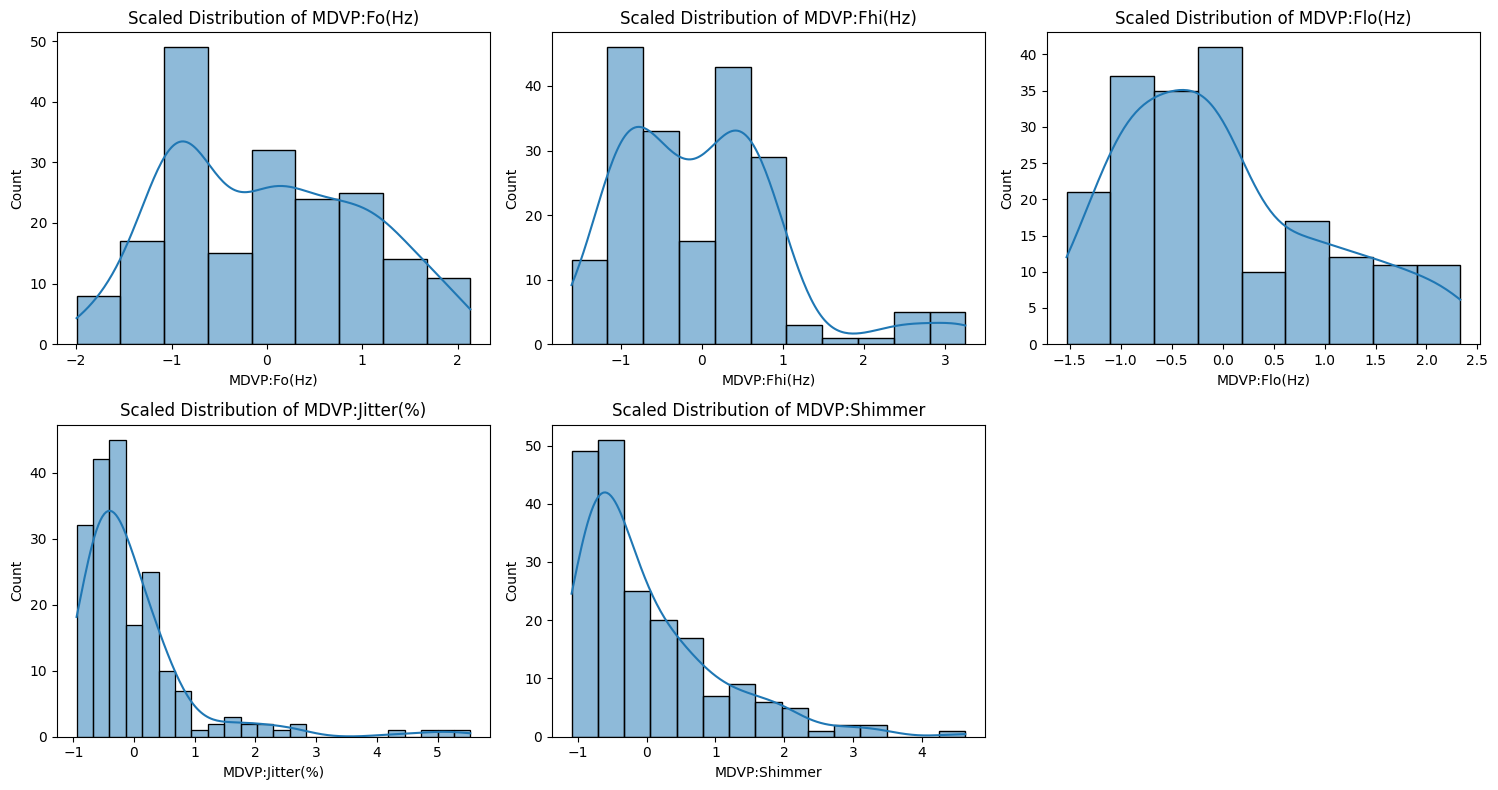

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df[skewed_features] = scaler.fit_transform(df[skewed_features])

# Visualize the scaled features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(skewed_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Scaled Distribution of {feature}')
plt.tight_layout()
plt.show()

1.6 Data Preprocessing

In [ ]:
# Normalization of numerical features
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = df.drop(columns=['name', 'status']).columns

# Initializing the scaler
scaler = StandardScaler()

# Fitting and transforming the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the normalized dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,-0.827932,-0.416794,-1.128678,0.339480,0.749759,0.132963,0.760800,0.131755,0.760832,...,0.607532,-0.067893,-0.193225,1,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,phon_R01_S01_2,-0.752053,-0.572966,0.112446,0.721791,1.037674,0.453892,1.276809,0.452684,1.689639,...,1.548254,-0.137843,-0.634508,1,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,phon_R01_S01_3,-0.934737,-0.919335,0.052550,0.891945,1.325589,0.720770,1.585687,0.721813,1.216094,...,1.175323,-0.291633,-0.279760,1,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,phon_R01_S01_4,-0.934933,-0.780675,0.047495,0.781983,1.325589,0.578885,1.284076,0.577677,1.352632,...,1.340229,-0.280719,-0.281346,1,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,phon_R01_S01_5,-0.956656,-0.703524,0.028404,1.376747,1.901418,1.095750,2.047187,1.096793,1.841724,...,1.899461,-0.178026,-0.506745,1,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


## **Step 2: Splitting the dataset**

2.1 Import required libraries

In [ ]:
from sklearn.model_selection import train_test_split

2.2 Prepare the data for splitting

In [ ]:
# Separate the features and target variable
X = df.drop(columns=['name','status'])  # Features
Y = df['status']  # Target variable

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0      -0.827932     -0.416794     -1.128678        0.339480   
1      -0.752053     -0.572966      0.112446        0.721791   
2      -0.934737     -0.919335      0.052550        0.891945   
3      -0.934933     -0.780675      0.047495        0.781983   
4      -0.956656     -0.703524      0.028404        1.376747   
..           ...           ...           ...             ...   
190     0.597252      0.645009     -0.449182       -0.337507   
191     1.304586      0.897190     -0.603782       -0.118549   
192     0.608226      0.751082     -1.156909        1.533963   
193     1.102726      2.144644     -1.132361        0.247954   
194     1.390911      0.975490     -1.013150       -0.112297   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            0.749759  0.132963  0.760800    0.131755      0.760832   
1            1.037674  0.453892  1.276809    0.452684      1.689639   
2            1.325

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


2.3 Split the dataset

In [ ]:
# Perform stratified splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Display the shape of the resulting datasets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check the distribution of the target variable in the training and testing sets
print("\nTraining set 'status' distribution:")
print(Y_train.value_counts(normalize=True))

print("\nTesting set 'status' distribution:")
print(Y_test.value_counts(normalize=True))

Training set size: (156, 22)
Testing set size: (39, 22)

Training set 'status' distribution:
status
1    0.75641
0    0.24359
Name: proportion, dtype: float64

Testing set 'status' distribution:
status
1    0.74359
0    0.25641
Name: proportion, dtype: float64


## **Step 3: Model Selection, Training & Visualizations**

Importing basic functions from required libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

## **3.1 Logistic Regression**

3.1.1 Predicting Results

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print(Y_pred)

[1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 1 0]


3.1.2 Computing Performance Metrices

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Logistic Regression - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

Logistic Regression - Accuracy: 0.92, Precision: 0.93, Recall: 0.97, F1-Score: 0.95


3.1.3 Confusion Matrix Visualization

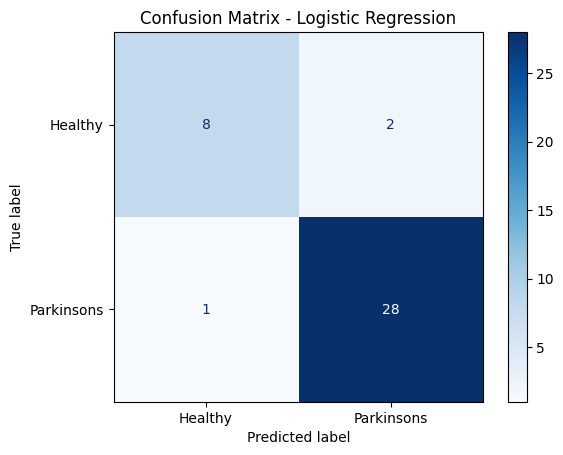

In [ ]:
# Assuming `y_test` is your test labels and `y_pred` is the predicted labels
Y_pred = logreg.predict(X_test)  # Logistic Regression predictions

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Parkinsons'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


3.1.4 ROC Curve Visualization

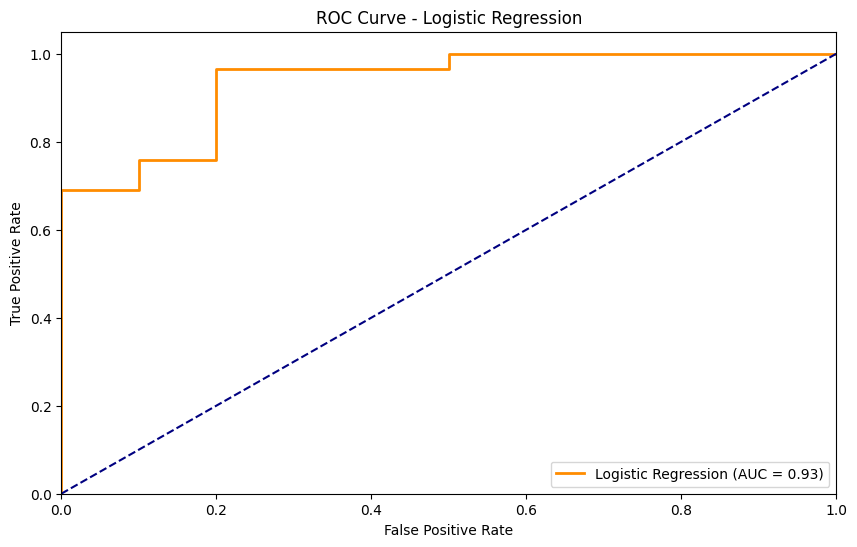

In [ ]:
# Get probability estimates for the positive class
Y_prob = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = roc_auc_score(Y_test, Y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


## **3.2 Support Vector Machine**

3.2.1 Predicting Results

In [ ]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
print(Y_pred)


[1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 1 0]


3.2.2 Computing Performance Metrices

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'SVM - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')


SVM - Accuracy: 0.92, Precision: 0.93, Recall: 0.97, F1-Score: 0.95


3.2.3 Confusion Matrix Visualization

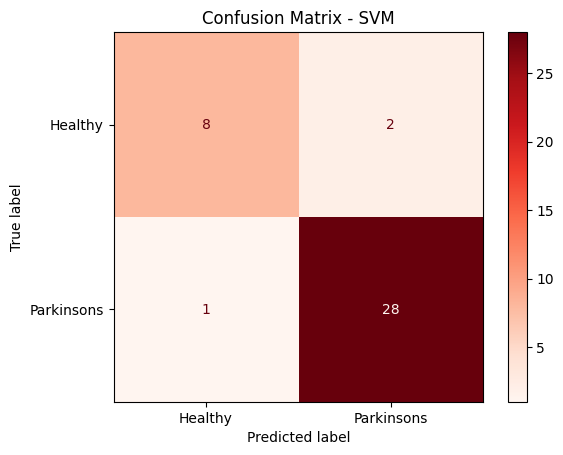

In [ ]:
Y_pred_svm = svm.predict(X_test)  # SVM predictions

cm = confusion_matrix(Y_test, Y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Parkinsons'])
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix - SVM')
plt.show()

3.2.4 ROC Curve Visualization

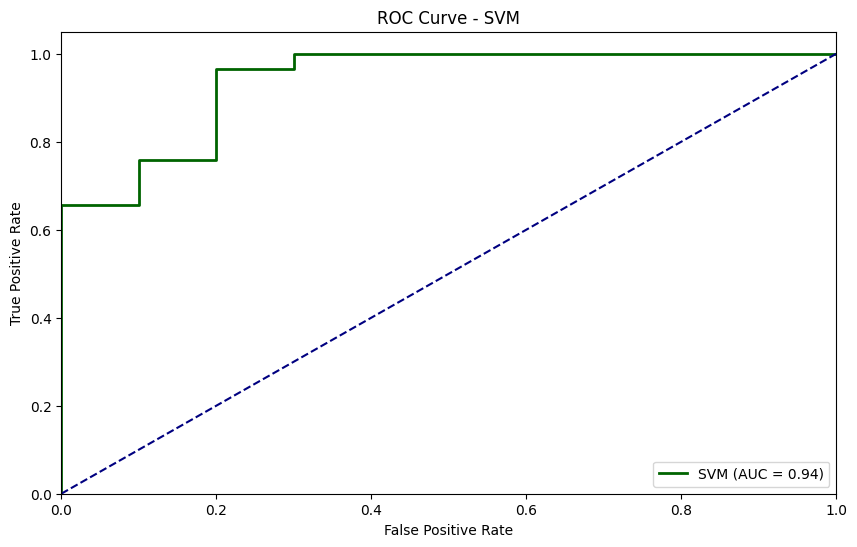

In [ ]:
Y_prob_svm = svm.decision_function(X_test)  # Use decision_function for SVM

# Compute ROC curve and ROC area
fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_prob_svm)
roc_auc_svm = roc_auc_score(Y_test, Y_prob_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='darkgreen', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

## **3.3 Decision Trees**

3.3.1 Predicting Results

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
print(Y_pred)

[0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 0]


3.3.2 Computing Performance Metrices

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Decision Tree - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

Decision Tree - Accuracy: 0.85, Precision: 0.90, Recall: 0.90, F1-Score: 0.90


3.3.3 Confusion Matrix Visualization

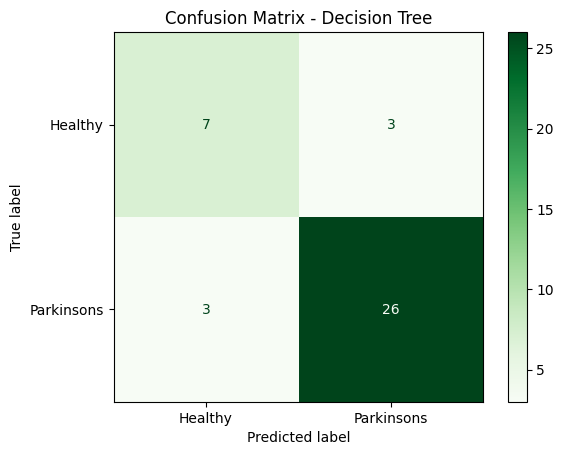

In [ ]:
# Assuming `y_test` is your test labels and `y_pred_tree` is the predicted labels
Y_pred_tree = decision_tree.predict(X_test)  # Decision Tree predictions

cm = confusion_matrix(Y_test, Y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Parkinsons'])
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

3.3.4 Feature Importance Visualization

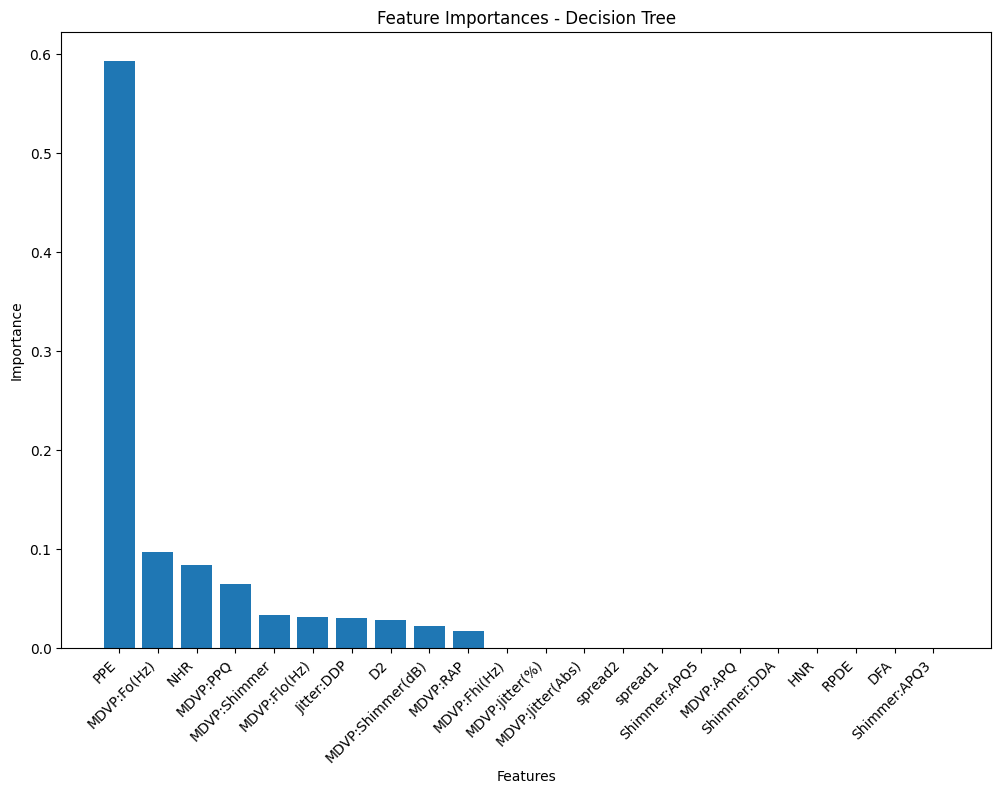

In [ ]:
feature_importances = decision_tree.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Decision Tree")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=45, ha="right")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## **3.4 Random Forest**

3.4.1 Predicting Results

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
print(Y_pred)

[1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1
 1 0]


3.4.2 Computing Performance Metrices

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Random Forest - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

Random Forest - Accuracy: 0.92, Precision: 0.93, Recall: 0.97, F1-Score: 0.95


3.4.3 Confusion Matrix Visualization

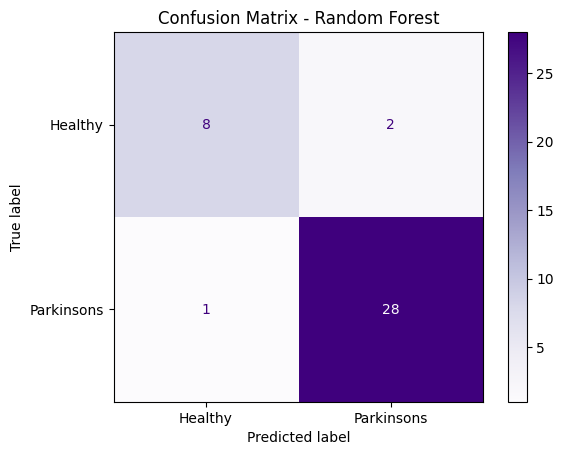

In [ ]:
Y_pred_rf = random_forest.predict(X_test)  # Random Forest predictions

cm = confusion_matrix(Y_test, Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Parkinsons'])
disp.plot(cmap=plt.cm.Purples)
plt.title('Confusion Matrix - Random Forest')
plt.show()

3.4.4 Feature Importance Visualization

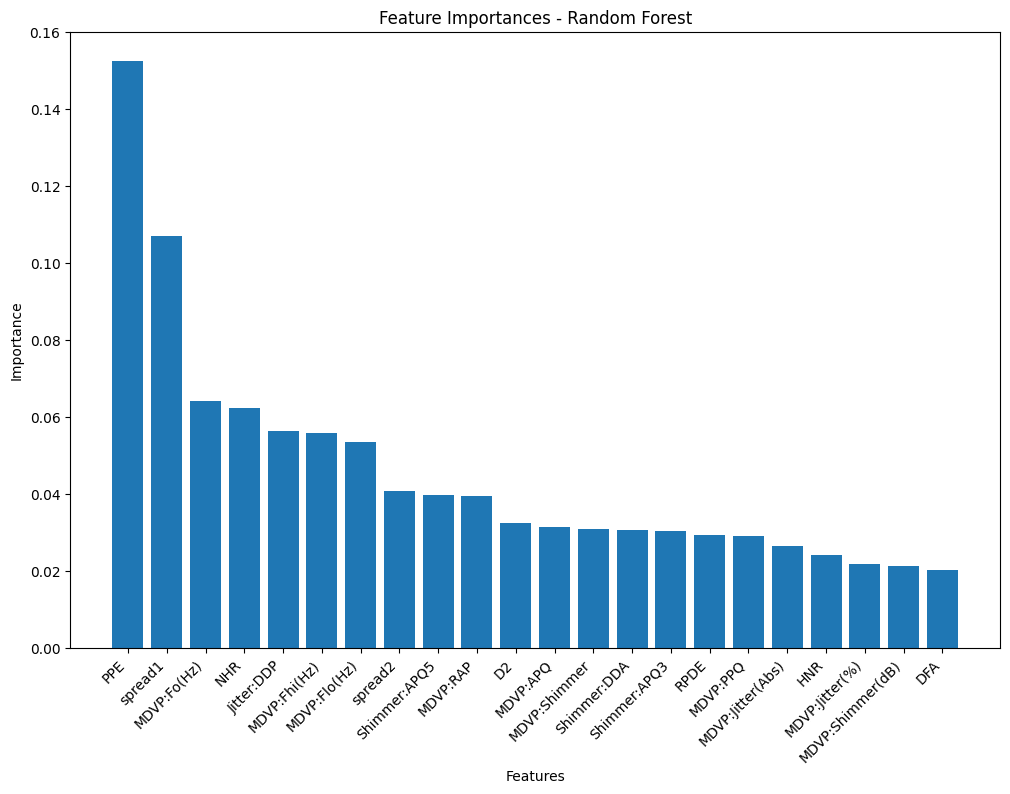

In [ ]:
feature_importances = random_forest.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=45, ha="right")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()